# ANL252 - Python for Data Analytics
## End-of-Course Assessment - July Semester 2022


In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# reading in dataset

df = pd.read_csv("ECA_data.csv")
df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


### Question 1
List the categorical and numeric variables in this dataset.

In [2]:
from tabulate import tabulate

table = [['Variable','Data Type'],
         ['ID','Nominal'],
         ['LIMIT','Numerical'],
         ['BALANCE','Numerical'],
         ['INCOME','Numerical'],
         ['RATING','Categorical'],
         ['GENDER','Categorical'],
         ['EDUCATION','Categorical'],
         ['MARITAL','Categorical'],
         ['AGE','Numerical'],
         ['S(n)','Categorical'],
         ['B(n)','Numerical'],
         ['R(n)','Numerical']]

print(tabulate(table, headers='firstrow', tablefmt='simple'))

Variable    Data Type
----------  -----------
ID          Nominal
LIMIT       Numerical
BALANCE     Numerical
INCOME      Numerical
RATING      Categorical
GENDER      Categorical
EDUCATION   Categorical
MARITAL     Categorical
AGE         Numerical
S(n)        Categorical
B(n)        Numerical
R(n)        Numerical


From the data, (1) Rating (2) Gender (3) Education (4) Marital and (5) S(n) are categorical variables whereas (1) Limit (2) Balance (3) Income (5) Age (6) B(n) (7) R(n) are numerical variables


### Question 2
Conduct four (4) data pre-processing tasks for the analysis of the data, explaining
results obtained.

In [3]:
# 1st Task is to remove any white spaces before & after the column names

df.columns = df.columns.str.strip()
df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [4]:
# 2nd Task is to check the data types and observe that they match the intended data types

print(f"Shape of the dataset = {df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset = (18769, 24) 

Data types are below where 'object' indicates a string type: 
ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object


In [5]:
# we observe that 'R3' is indicated as an 'object' due to some values
# having the '$' and ',' sign

df['R3'] = df['R3'].str.strip('$').replace(',','', regex=True).astype(str).astype(int)
print(df['R3'].dtypes)

int32


In [6]:
# 3rd task is to check the data for missing values

print(f"Number of missing values for each column:")
print(df.isnull().sum())

Number of missing values for each column:
ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64


In [7]:
# since we have an abundance of data (18769 data), we will drop all rows with missing values
df.dropna(inplace=True)
print(f"Number of missing values for each column:")
print(df.isnull().sum())

Number of missing values for each column:
ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64


In [8]:
# 4th task is to check for any weird values in age
df['AGE'].value_counts()

 29     994
 27     943
 28     898
 30     869
 31     778
 26     771
 25     722
 32     721
 34     721
 35     721
 33     695
 36     674
 24     658
 37     651
 38     612
 39     601
 23     564
 40     562
 41     524
 42     496
 44     447
 43     420
 45     402
 46     373
 22     333
 47     306
 48     276
 49     273
 50     267
 51     204
 53     188
 52     187
 54     163
 55     142
 56     118
 58      75
 57      69
 59      52
 21      41
 61      37
 60      36
 62      28
 64      21
 63      16
 65      15
 66      13
 69       8
 67       8
-1        5
 199      5
 70       5
 68       2
 73       2
 72       2
 75       2
 71       1
 80       1
 79       1
 74       1
Name: AGE, dtype: int64

In [9]:
# we see that there are 5 counts of '-1' and '199' each
# we shall remove them as well

df.drop(df[df['AGE'] == 199].index, inplace = True)
df.drop(df[df['AGE'] == -1].index, inplace = True)
df['AGE'].value_counts()

29    994
27    943
28    898
30    869
31    778
26    771
25    722
32    721
34    721
35    721
33    695
36    674
24    658
37    651
38    612
39    601
23    564
40    562
41    524
42    496
44    447
43    420
45    402
46    373
22    333
47    306
48    276
49    273
50    267
51    204
53    188
52    187
54    163
55    142
56    118
58     75
57     69
59     52
21     41
61     37
60     36
62     28
64     21
63     16
65     15
66     13
69      8
67      8
70      5
68      2
72      2
75      2
73      2
80      1
79      1
71      1
74      1
Name: AGE, dtype: int64

### Question 3
Articulate five (5) relevant insights of the data, with supporting visualization for each
insight.

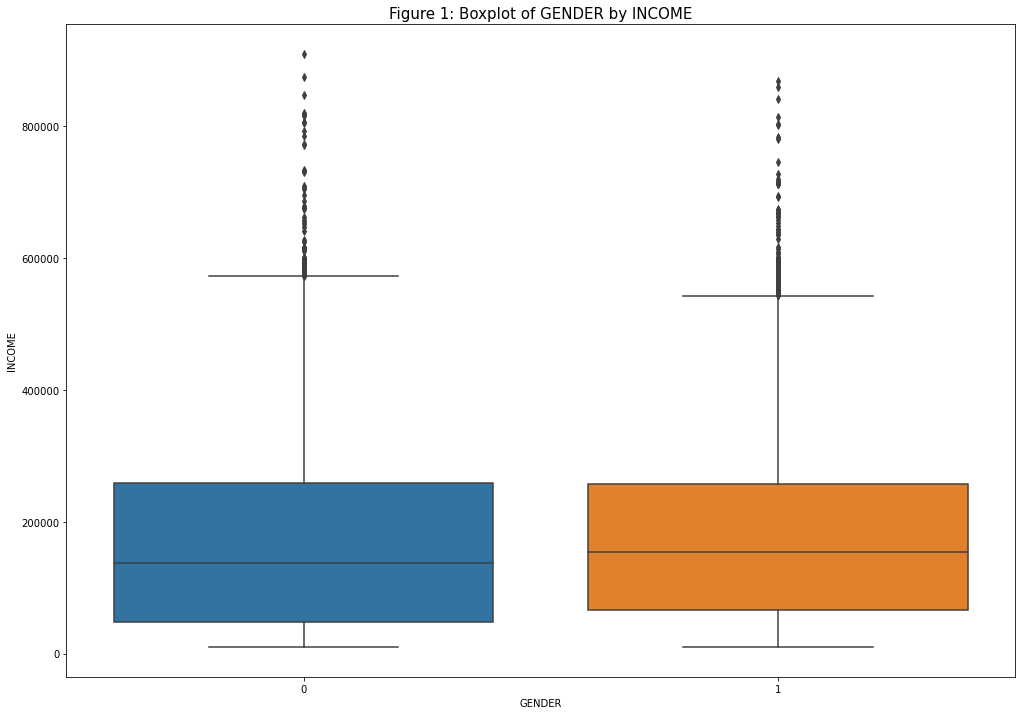

In [10]:
plt.figure(figsize = (17,12))
fig_1 = sns.boxplot(x ='GENDER', y ='INCOME', data = df)
plt.title('Figure 1: Boxplot of GENDER by INCOME', fontsize = 15)
plt.xlabel('GENDER', fontsize = 10)
plt.ylabel('INCOME', fontsize = 10) 
plt.show()

###  From Figure 1, we can see that the median, IQR and minimum for males and females are almost the same. However, when we further examine the outliers, we can conclude the male have a slightly higher outlier maximum as compared to the females. The males has a higher maximum value according to the boxplot as compared to the female as well.

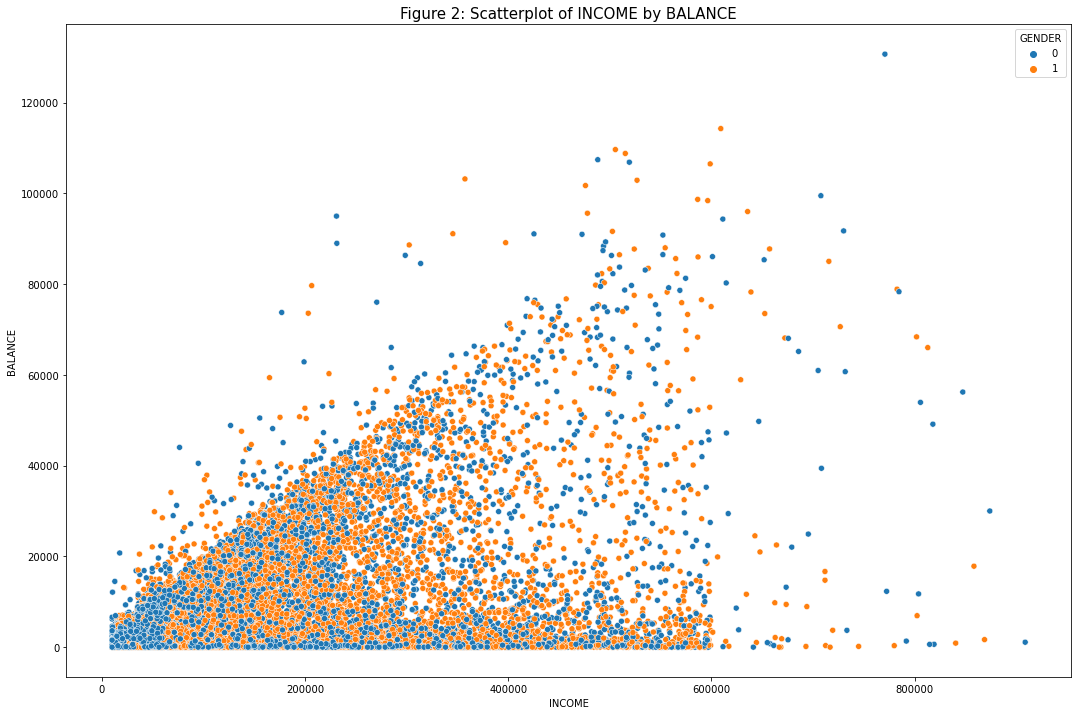

In [11]:
plt.figure(figsize = (18,12))
fig_2 = sns.scatterplot(x ='INCOME', y ='BALANCE', hue='GENDER', data = df)
plt.title('Figure 2: Scatterplot of INCOME by BALANCE', fontsize = 15)
plt.xlabel('INCOME', fontsize = 10)
plt.ylabel('BALANCE', fontsize = 10) 
plt.show()

### From Figure 2, we can observe that the distribution is somewhat linearly distributed for both male and female. As the income increases, the balance that they have would increase as well. It is also fair to say that there is a fair number of people who have a higher income but have no savings as well. This indicates that they do not save the income that they generate

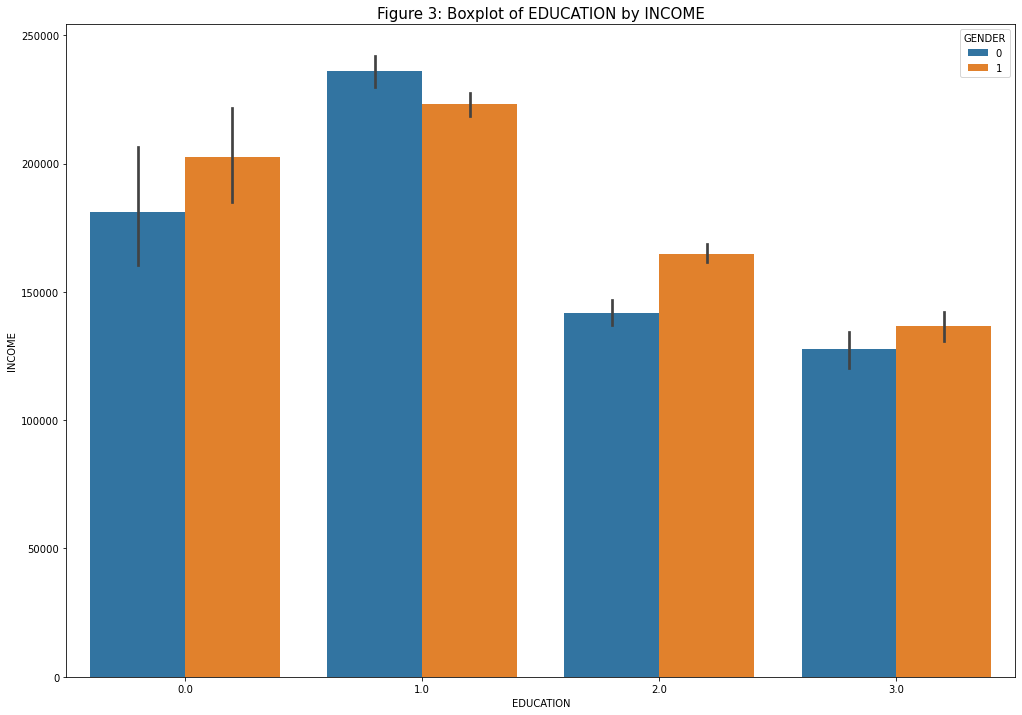

In [12]:
plt.figure(figsize = (17,12))
fig_3 = sns.barplot(x ='EDUCATION', y ='INCOME', hue='GENDER', data = df)
plt.title('Figure 3: Boxplot of EDUCATION by INCOME', fontsize = 15)
plt.xlabel('EDUCATION', fontsize = 10)
plt.ylabel('INCOME', fontsize = 10) 
plt.show()

### From Figure 3, the data suggests that those that have a postgraduate qualification has the highest income. Qualifications stated under 'Other' has the 2nd highest income followed by tertiary and high school. Also, females, in all education level other than those having postgraduate qualifications, have higher income than males.

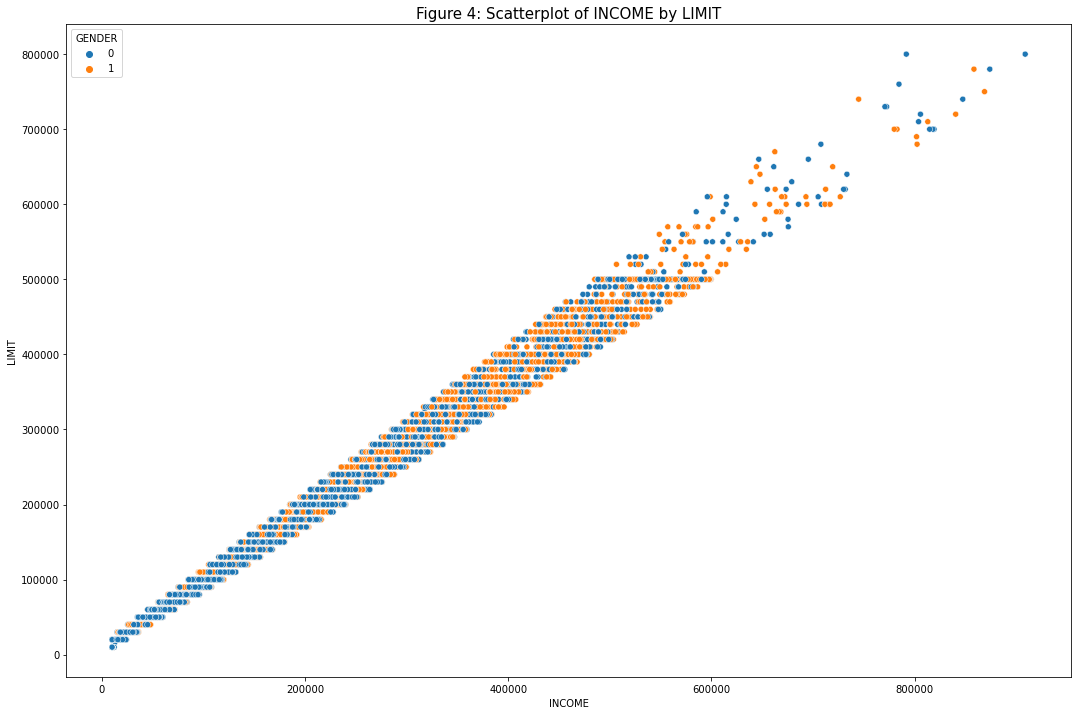

In [13]:
plt.figure(figsize = (18,12))
fig_4 = sns.scatterplot(x ='INCOME', y ='LIMIT', hue='GENDER', data = df)
plt.title('Figure 4: Scatterplot of INCOME by LIMIT', fontsize = 15)
plt.xlabel('INCOME', fontsize = 10)
plt.ylabel('LIMIT', fontsize = 10) 
plt.show()

### From Figure 4, The data suggests that the limit is directly proportionate to the income they have. This applies for both male and female.

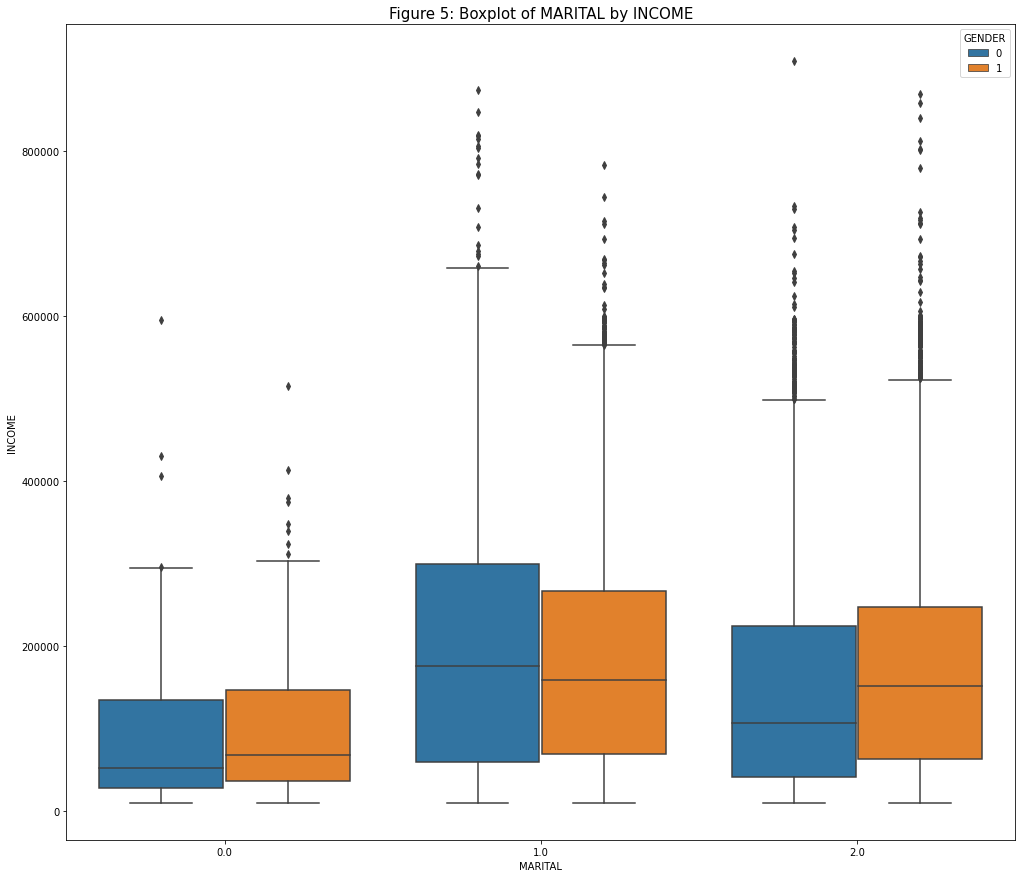

In [14]:
plt.figure(figsize = (17,15))
fig_5 = sns.boxplot(x ='MARITAL', y ='INCOME', hue='GENDER', data = df)
plt.title('Figure 5: Boxplot of MARITAL by INCOME', fontsize = 15)
plt.xlabel('MARITAL', fontsize = 10)
plt.ylabel('INCOME', fontsize = 10) 
plt.show()

### From Figure 5, we can observe that the average single man makes more income than the average single woman. They also have a higher income than men who are married or categorised as 'others'. Women on the other hand, on average, have the same income as when they are single or married. However, women who are categorised as 'others' has lesser income than those single or married.

### Question 4
Perform linear regression modelling to predict the variable, B1, explaining the approach taken, including any further data pre-processing.

In [15]:
X = df.loc[:, 'B1'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.loc[:, 'B2'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

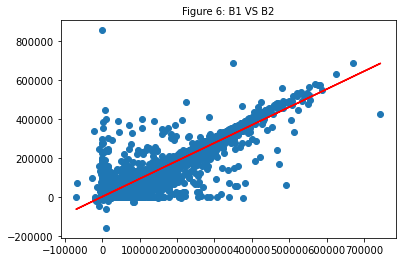

In [16]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('Figure 6: B1 VS B2', fontsize = 10)
plt.show()

Using the data, we have plotted B1 against B2 to find the linear regression model. In Figure 6, we can see the red line which describes the regression line.

### Question 5
State the linear regression equation and explain key insights from the results obtained in Question 4.

In [17]:
print(f'The regression equation is y = {linear_regressor.coef_}x + {linear_regressor.intercept_}.')

The regression equation is y = [[0.91800757]]x + [2284.93864928].


The key insights obtained from the results in Question 4 are as follows

There is linear relationship between B1 and B2 

There is a positive correleation from the independent variables (B1) and the dependent variables in (B2)

In the regression model, it is evident that there are more residues on the lower end of the model and outliers (i.e., between 300000 and 20000) this indicates that the data is not evenly distributed.